# Coursera data analysis project

## Dataset import

Cell is used for reading given dataset and check first view of raw dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


file = r'D:\IT_projects\Turing_Colledge\Modul1\Sprint3\project\coursea_data.csv'
raw_df = pd.read_csv(file, index_col=0)
raw_df.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


## Data inspection

Check last 10 rows of the given data for any faults/malfunctions  
First 10 rows have already been checked in first cell

In [2]:
raw_df.tail(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
132,Машинное обучение и анализ данных,E-Learning Development Fund,SPECIALIZATION,4.7,Intermediate,77k
405,Основы Digital Маркетинга,National Research University Higher School of ...,SPECIALIZATION,4.5,Intermediate,19k
703,Основы программирования на Python,National Research University Higher School of ...,COURSE,4.6,Beginner,83k
841,Основы разработки на C++: белый пояс,E-Learning Development Fund,COURSE,4.9,Intermediate,41k
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


It can be seen that not english type letters are used  
at "course_title" along with english type letters.

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


Some information/observation can be extracted at this moment:  
- In total there are 891 observations and 6 features;  
- In course_title there are more than one language text;  
- Dataframe is sorted by course_title ascending;  
- Last column should be converted to INT;  
- At the beggining of dataset import, prediction has been taken that first  
column might be index. It needs to be proved.

Prediction of index numbers at the cell bellow

In [4]:
print(raw_df.index)
print(f'Is there any duplicates?: {raw_df.index.duplicated().any()}')
print(f'Min number: {min(raw_df.index)}\nMax number: {max(raw_df.index)}')

Index([134, 743, 874, 413, 635, 661,  54, 488,  58, 129,
       ...
       132, 405, 703, 841, 889, 236, 883, 545, 875, 163],
      dtype='int64', length=891)
Is there any duplicates?: False
Min number: 0
Max number: 890


Results above proves that first columns numbers are  
indexes because there are 891 numbers with no duplicates  
and it starts from 0 to 890

In [5]:
raw_df = raw_df.sort_index(ascending=True)
raw_df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11k
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k


Dataframe was sorted by index in ascending order

In the script below we get amount of unique values of each column

In [6]:
columns = raw_df.columns.unique()
num = [(len(raw_df[col].unique()), col) for col in columns]
for c in num:
    print(f'There are {c[0]} unique values of {c[1]}')

There are 888 unique values of course_title
There are 154 unique values of course_organization
There are 3 unique values of course_Certificate_type
There are 14 unique values of course_rating
There are 4 unique values of course_difficulty
There are 205 unique values of course_students_enrolled


## Data Cleaning

Checking for anomalies

In [7]:
raw_df.columns = raw_df.columns.str.strip()
raw_df_duplicates = raw_df.duplicated().any()
raw_df_nan = raw_df.isna().any().any()
raw_df_emptycells = (raw_df == "").any().any()

print(f'Is there any duplicates in dataframe?: {raw_df_duplicates}')
print(f'Is there any NaN values in dataframe?: {raw_df_nan}')
print(f'Is there any empty cells in dataframe?: {raw_df_emptycells}')


Is there any duplicates in dataframe?: False
Is there any NaN values in dataframe?: False
Is there any empty cells in dataframe?: False


Dataset has no duplicates, NaN values or empty cells

Converting "course_students_enrolled" to INT numbers

In [8]:
def convert(val):
    if val[-1] == "k":
        return int(float(val[:-1]) * 1000)
    elif val[-1] == "m":
        return int(float(val[:-1]) * (10 ** 6))
    else:
        return int(val)

raw_df['course_students_enrolled'] = raw_df['course_students_enrolled'].apply(convert)
cleaned_df = raw_df
cleaned_df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11000
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33000
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6600
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45000


To prevent possible future mistakes, all columns name  
letters were converted to lower

In [9]:
cleaned_df.rename(columns=lambda x: x.lower(), inplace=True)


### Overall outliers for numeric type columns

In [11]:
numeric = cleaned_df[["course_rating", "course_students_enrolled"]]
course_r_mean = numeric["course_rating"].mean()
course_se_mean = numeric["course_students_enrolled"].mean()
course_r_std = numeric["course_rating"].std()
course_se_std = numeric["course_students_enrolled"].std()

numeric_desc = numeric.describe().T
numeric_desc["UCL"] = numeric_desc["mean"] + 2 * numeric_desc["std"]
numeric_desc["LCL"] = numeric_desc["mean"] - 2 * numeric_desc["std"] # we have negative LCL due to ultra hight anomalies

numeric_desc

,count,mean,std,min,25%,50%,75%,max,UCL,LCL
course_rating,891.0,4.677329,0.162225,3.3,4.6,4.7,4.8,5.0,5.001779,4.352879
course_students_enrolled,891.0,90552.076319,181936.453852,1500.0,17500.0,42000.0,99500.0,3200000.0,454424.984022,-273320.831384


Outliers for numeric value columns calculated  
with std + 2 sigma which would be 5% of LCL  
and UCL

In [12]:
prep_df = cleaned_df[
    (cleaned_df["course_rating"] > numeric_desc["LCL"]["course_rating"])
    & (cleaned_df["course_rating"] < numeric_desc["UCL"]["course_rating"])
]
prep_df = cleaned_df[
    (
        cleaned_df["course_students_enrolled"]
        > numeric_desc["LCL"]["course_students_enrolled"]
    )
    & (
        cleaned_df["course_students_enrolled"]
        < numeric_desc["UCL"]["course_students_enrolled"]
    )
].reset_index(drop=True)
prep_df.head(5)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000
1,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000
2,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220000
3,Cloud Engineering with Google Cloud,Google Cloud,PROFESSIONAL CERTIFICATE,4.7,Intermediate,310000
4,Architecting with Google Compute Engine,Google Cloud,SPECIALIZATION,4.7,Intermediate,310000


New dataframe was constructed with offcasted 5% of  
data (outliers)

In [13]:
outliers_df = cleaned_df[~cleaned_df["course_title"].isin(prep_df["course_title"])]
outliers_df.head(4)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000


Dataframe for outliers was constructed as well  
for future analysis

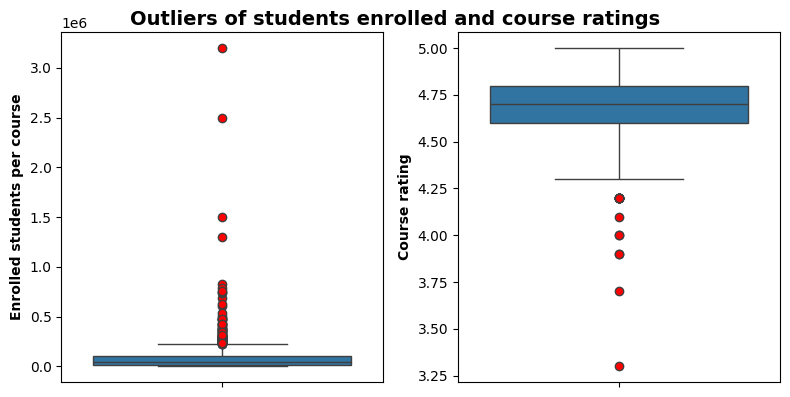

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(
    numeric["course_students_enrolled"],
    ax=ax[0],
    showfliers=True,
    flierprops=dict(markerfacecolor="red", marker="o"),
)
ax[0].set_ylabel("Enrolled students per course", fontweight="bold", fontsize=10)
sns.boxplot(
    numeric["course_rating"],
    ax=ax[1],
    showfliers=True,
    flierprops=dict(markerfacecolor="red", marker="o"),
)
ax[1].set_ylabel("Course rating", fontweight="bold", fontsize=10)
plt.tight_layout()
fig.suptitle(
    "Outliers of students enrolled and course ratings",
    fontsize=14,
    fontweight="bold",
    ha="center",
)
plt.show()

For better view of outliers, box plots were plotted  
with outliers marked as red dots. Plots shows data  
distribution as well.

## Exploratory Data Analysis (EDA)

In [15]:
shp = cleaned_df.shape
d_types = cleaned_df.dtypes
catf_list = list(cleaned_df.select_dtypes(include=["object"]).columns)
numf_list = list(cleaned_df.select_dtypes(include=np.number).columns)
course_uniq = cleaned_df["course_title"].unique()
organiz_uniq = cleaned_df["course_organization"].unique()
certifs_uniq = cleaned_df["course_certificate_type"].unique()
diffic_uniq = cleaned_df["course_difficulty"].unique()
max_stud = cleaned_df.loc[cleaned_df["course_students_enrolled"].idxmax()]
min_stud = cleaned_df.loc[cleaned_df["course_students_enrolled"].idxmin()]

print(f"Dataset consists of {shp[1]} features and {shp[0]} observations\n")
print(f"These are categorical features: {', '.join(catf_list)}\n")
print(f"These are numerical features: {', '.join(numf_list)}\n")
print(f"There are different courses: {len(course_uniq)}\n")
print(f"There are different course organizations: {len(organiz_uniq)}\n")
print(f"There are different certificate types: {len(certifs_uniq)}\n")
print(f"There are different course difficulties: {len(diffic_uniq)}\n")
print(
    f"The most popular course organization is {max_stud['course_organization']} with {max_stud['course_students_enrolled']} students\n"
)
print(
    f"The least popular course organization is {min_stud['course_organization']} with {min_stud['course_students_enrolled']} students\n"
)


Dataset consists of 6 features and 891 observations

These are categorical features: course_title, course_organization, course_certificate_type, course_difficulty

These are numerical features: course_rating, course_students_enrolled

There are different courses: 888

There are different course organizations: 154

There are different certificate types: 3

There are different course difficulties: 4

The most popular course organization is Stanford University with 3200000 students

The least popular course organization is Universidad Austral with 1500 students



To check how many organizations are with more than  
one course in it, a code was used in a cell below

In [96]:
orgs = cleaned_df.groupby("course_organization").size().reset_index(name="different_courses")
orgs = orgs[orgs["different_courses"] > 1].reset_index(drop=True)
sor = orgs.sort_values(by="different_courses", ascending=False)

print(f"There are {len(orgs)} organizations with more than one course\n")
print(f" Most courses having organization: {sor.iloc[0]['course_organization']} with {sor.iloc[0]['different_courses']} courses\n",
      f"Second most: {sor.iloc[1]['course_organization']} with {sor.iloc[1]['different_courses']} courses\n",
      f"Third most: {sor.iloc[2]['course_organization']} with {sor.iloc[2]['different_courses']} courses\n")

There are 105 organizations with more than one course

 Most courses having organization: University of Pennsylvania with 59 courses
 Second most: University of Michigan with 41 courses
 Third most: Google Cloud with 34 courses



There was idea to check correlation between numeric values  
but because only two columns were numeric, two more were converted  
to numeric, giving each of these a number between 1 and 4 depending on  
quality it has

In [17]:
certificates = cleaned_df["course_certificate_type"].unique()
difficulties = cleaned_df["course_difficulty"].unique()
leveled_df = cleaned_df
leveled_df["certificate_type_num"] = leveled_df["course_certificate_type"].apply(
    lambda x: (
        1
        if x == certificates[2]
        else (2 if x == certificates[1] else (3 if x == certificates[0] else None))
    )
)
leveled_df["course_difficulty_num"] = leveled_df["course_difficulty"].apply(
    lambda x: (
        1
        if x == difficulties[0]
        else (
            2
            if x == difficulties[2]
            else (3 if x == difficulties[1] else (4 if x == difficulties[3] else None))
        )
    )
)
leveled_correl = leveled_df[
    [
        "course_rating",
        "course_students_enrolled",
        "certificate_type_num",
        "course_difficulty_num",
    ]
].corr()

For a better view, triangle type heatmap was plotted

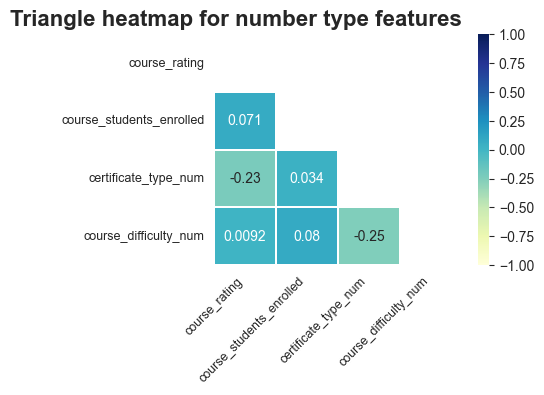

In [18]:

mask = np.triu(np.ones_like(leveled_correl))

sns.set_style("white")
plt.figure(figsize=(4, 3))
sns.heatmap(leveled_correl, annot=True, linewidths=0.1, cmap="YlGnBu", vmin=-1, vmax=1, mask=mask)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.title("Triangle heatmap for number type features", fontweight="bold", fontsize=16, loc="right")
plt.show()

Despite the fact more numeric type columns were added, no significant  
correlation between each of those were observed

In [19]:
cleaned_df.head(3)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,certificate_type_num,course_difficulty_num
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000,3,1
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000,2,1
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000,1,3


### Course difficulty section

Percentage of different difficulty courses available  
were calculated and dataframe created

In [48]:
choose_by_difficulty = prep_df[["course_title", "course_difficulty"]].groupby("course_difficulty").count()
courses = prep_df.index.max()
choose_by_difficulty["percentage"] = choose_by_difficulty["course_title"].apply(lambda x:round(x * 100 / courses, 2))

choose_by_difficulty

,course_title,percentage
course_difficulty,,
Advanced,19,2.18
Beginner,477,54.76
Intermediate,194,22.27
Mixed,182,20.90


To check course difficulty on by course rating and enrolled students,  
two subplots were created

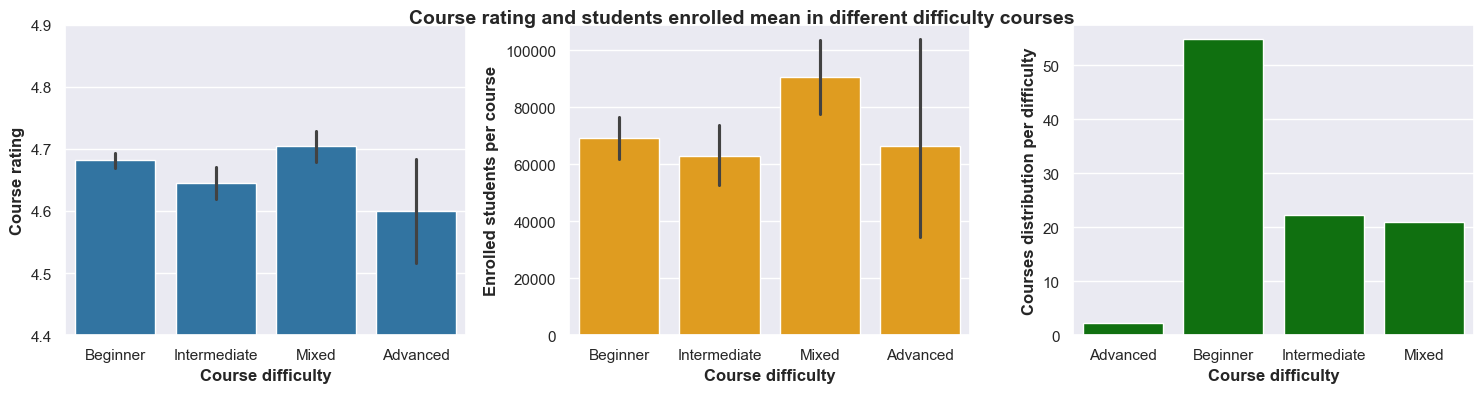

In [49]:
sns.set_style("darkgrid")
sns.set_context("notebook")
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(prep_df, x="course_difficulty", y="course_rating", ax=ax[0])
ax[0].set_ylim(4.4, 4.9)
ax[0].set_xlabel("Course difficulty", fontweight="bold")
ax[0].set_ylabel("Course rating", fontweight="bold")

sns.barplot(prep_df, x="course_difficulty", y="course_students_enrolled", ax=ax[1], color="orange")
ax[1].set_xlabel("Course difficulty", fontweight="bold")
ax[1].set_ylabel("Enrolled students per course", fontweight="bold")

sns.barplot(data=choose_by_difficulty, x=choose_by_difficulty.index, y="percentage", ax=ax[2], color="green")
ax[2].set_xlabel("Course difficulty", fontweight="bold")
ax[2].set_ylabel("Courses distribution per difficulty", fontweight="bold")

plt.tight_layout()
fig.suptitle("Course rating and students enrolled mean in different difficulty courses",
             size=14,
             fontweight="bold",
             ha="center")

plt.show()

From both plots it can be seen that mixed difficulty courses were  
rated highest average and these courses had most enrolled students  
on average.  
Significantly lower courses average ratings were on advanced course  
difficulty.  
From the last plot can be seen than most more than half of the courses  
are for Beginner level and the least amount of courses are for Advanced.  
Intermediate and Mixed level courses shares similar 20 percents each of   
all courses.

Histogram plot for enrolled students by course difficulty  
was created

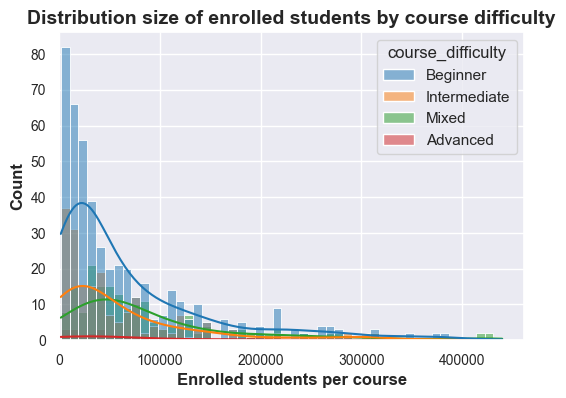

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(
    data=prep_df,
    x="course_students_enrolled",
    bins=50,
    kde=True,
    hue="course_difficulty"
)
plt.xlabel("Enrolled students per course", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Distribution size of enrolled students by course difficulty", fontweight="bold", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlim(0)
plt.show()

It can be seen, that the highest amount of students enrolls to  
begginer courses, then follows intermediate and mixed and the least  
amount of students studies at advanced level courses.  
KDE lines shows as well, that to each course difficulty studies,  
enrolled students amount mostly varies 30k - 80k. Better view could be  
seen on the plot below this cell

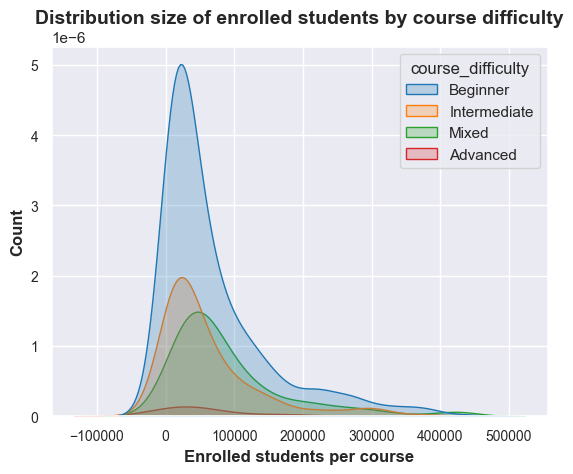

In [22]:
sns.kdeplot(data=prep_df, x="course_students_enrolled", hue="course_difficulty", fill=True)
plt.xlabel("Enrolled students per course", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Distribution size of enrolled students by course difficulty", fontweight="bold", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

### Course certificate type section

In [23]:
prep_df.head(3)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
0,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000
1,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000
2,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220000


In [55]:
choose_by_type = prep_df[["course_title", "course_certificate_type"]].groupby("course_certificate_type").count()
courses = prep_df.index.max()
choose_by_type["percentage"] = choose_by_type["course_title"].apply(lambda x:round(x * 100 / courses, 2))

choose_by_type

,course_title,percentage
course_certificate_type,,
COURSE,574,65.90
PROFESSIONAL CERTIFICATE,11,1.26
SPECIALIZATION,287,32.95


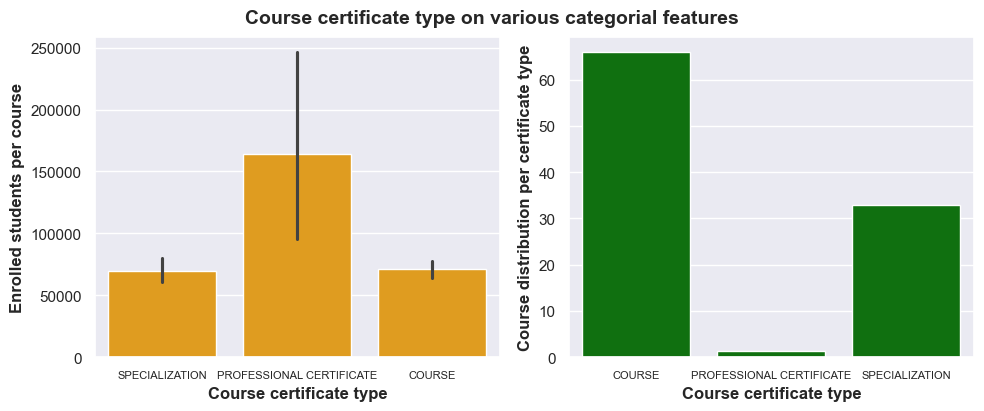

In [61]:
sns.set_style("darkgrid")
sns.set_context("notebook")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(prep_df, x="course_certificate_type", y="course_students_enrolled", ax=ax[0], color="orange")
ax[0].set_xlabel("Course certificate type", fontweight="bold")
ax[0].set_ylabel("Enrolled students per course", fontweight="bold")
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)

sns.barplot(choose_by_type, x=choose_by_type.index, y="percentage", ax=ax[1], color="green")
ax[1].set_xlabel("Course certificate type", fontweight="bold")
ax[1].set_ylabel("Course distribution per certificate type", fontweight="bold")
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)

plt.tight_layout()
fig.suptitle("Course certificate type on various categorial features",
             size=14,
             fontweight="bold",
             ha="center",
             va="bottom")

plt.show()
